# HW 3

In [96]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## Problem 1

### 1a) Which algorithm makes the fewest mistakes?
There are 48 birds and 52 People. Here we compaire the new algorithm (NA) vs the the neural network algorithm (NN).

NN: NN Bird miss identified a person as a bird 5 times, and NN Person miss identified a person as a bird 3 times. 

- 5 + 3 = 8 mistakes total.

NA: NA Bird miss identified a person as a bird 11 times, and NN Person miss identified a person as a bird 1 times. 

- 11 + 1 = 12 mistakes total.

**The Neural Netowork (NN) Algorithem makes the fewest mistakes.**


### 1b) Which algorithm is better for the zoo? Explain.

For the zoo, we want to have the lowest miss identifications of birds as people so the door doesn't open. This way as few birds escape as possible. 

We care much more about identifying a true bird, even at the extent of possibly miss identifying a person as a bird.

NA bird miss identifies a person as a bird at a higher rate than NA bird does, but for the purposes of the zoo, we only care about the highest success rate of correctly classifying a bird. 

NA bird is correct 47 times, where NN bird is only correct 45 times. 

**The New Algorithm (NA) is better for the zoo.**

### 1c) During the pandemic the number of visitors plummets, and it is only the zoo keeper visiting. So instead of 52% of the photos taken at the aviary door being people, it is now only 1%. Make new truth tables for both algorithms.

There are still 48 birds, but now there is only 1 person.

The photos are 99% of birds, and only 1% of people. 

To find the correctness rate of the algorithms, we devide the total correctly sorted photos by the total number of photos the algorithm sorted through, and multiply by 100 to get a percentage.

**Neural Network Algorithm (NN)**

*NN Bird:*

Correctness rate of NN bird on the pre-pandemic data set:
$\frac{45 correct}{50 total} * 100 = 90\%$ 

To find the new values for the truth table, we multiply the correctness rates by the new numbers in the data set.

The new data set has 48 birds and 1 person, for a total of 49 images. 

- True bird = $90\% * 49 = 44.1 \approx 40 $ 

- NN bird miscategorizes $49 - 40 = 9$ birds as people


*NN Person:*

Correctness rate of NN person on the pre-pandemic data set:
$\frac{47 correct}{50 total} * 100 = 94\%$ 

New data set:
- True Person = $94\% * 49 = 46.06 \approx 46 $ 

- NN Person miscategorizes $49 - 46 = 3$ people as birds


|           |True Bird    | True Person |
|-----------|-------------|-------------|
| NN Bird   | 40          |      9      |
| NN Person | 3           |      46     |




**New Algorithm (NA)**

*NA Bird:*

Correctness rate of NA bird on the pre-pandemic data set:
$\frac{47 correct}{50 total} * 100 = 94\%$

New data set:
- True bird = $94\% * 49 = 46.06 \approx 46 $ 

- NA bird miscategorizes $49 - 46 = 3$ birds as people


*NA Person:*

Correctness rate of NA person on the pre-pandemic data set:
$\frac{42 correct}{50 total} * 100 = 84\%$ 

New data set: 
- True Person = $84\% * 49 = 41.16 \approx 41 $ 

- NA Person miscategorizes $49 - 41 = 8$ people as birds




|           |True Bird    | True Person |
|-----------|-------------|-------------|
| NA Bird   | 46          |      3      |
| NA Person | 8           |      41     |

## Problem 2

### 2a) What is the pdf of the sum of two identical exponential distributions?

Note: The pdf of a sum of two independent random variables = the convolution of their individual pdf's

Identical exponential distributions have the same rate parameter. The pdf of the sum of two independent identical exponential distributions is the same as the convolution of their individual pdf's. This distribution is an **Erlang distribution**. (The Erlang distribution is a special case of the gamma distribution.)

Sources: 
- [Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution#Sum_of_two_independent_exponential_random_variables)

- [Probability Distribution Relationships](https://en.wikipedia.org/wiki/Relationships_among_probability_distributions#Sum_of_variables)

- [List of Convolutions of Probability Distributions](https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions#Continuous_distributions)



In [97]:
#Create identical exponential data
d = stats.expon.rvs(loc = 5., scale = 0.01, size = 100000);
twoD = d+d

#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(twoD)

print('Erlang Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)



Erlang Fit Parameters:
    alpha =  0.9933970274221899
    loc =  10.000000235907969
    scale =  0.02013451214906936


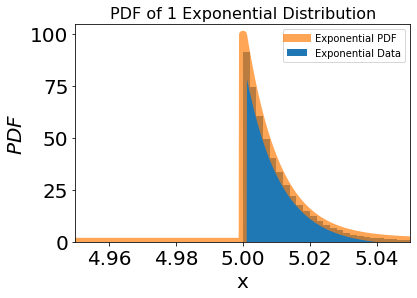

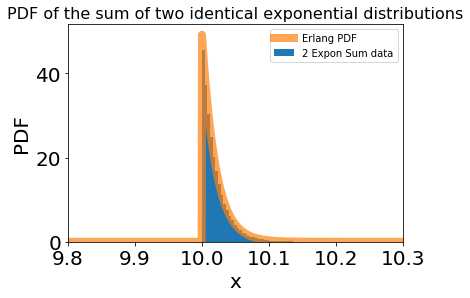

In [98]:
#Getting random exponential distribution of points

#-----Plot 1------
#Histogram with Probability Density function -- plot 1
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True, label='Exponential Data')
plt.tick_params(labelsize = 20)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
exponPdf = stats.expon.pdf(x,loc = 5., scale = 0.01)
ax.plot(x,exponPdf,linewidth = 8,alpha = 0.7, label='Exponential PDF')

#Setting plot title and lables
ax.set_xlabel('x', size = 20)
ax.set_ylabel('$PDF$', size = 20)
ax.set_title('PDF of 1 Exponential Distribution', size = 16)
plt.legend()
plt.show()


#-----Plot 2------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)

twoD = d+d
ax.hist(twoD,50, density=True, label='2 Expon Sum data')

plt.tick_params(labelsize = 20)
plt.xlim([9.8,10.3])

x = np.linspace(9.8,10.3,1000)

#Plots erlang pdf
ax.plot(x,stats.erlang.pdf(x,a = 1, loc = fit_loc, scale = fit_beta),linewidth = 8,alpha = 0.7, label='Erlang PDF')

#Setting plot title and lables
ax.set_xlabel('x', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('PDF of the sum of two identical exponential distributions', size = 16)
plt.legend()
plt.show()

### 2b) What is the pdf of the ratio of two zero-mean unity variance normal distributions  X1/X2 ?

As the sample size tends towards infinity, unit variance means that the variance will tend towards 1. 

A zero-mean unity variance normal distribution will then tend twards the *standard normal distribution*. 

The pdf of a ratio of two random variables each with their own distribution is called the *Ratio distribution*. 

When X1 and X2 are independent and normally distributed with a zero mean, their ratio is a **Cauchy Distribution**. 

A Cauchy distribution is a continuous probability distribution also known as the Lorentz distribution. 

Sources: 
- [Normal Distrubution - Standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution)

- [Ratio Distribution](https://en.wikipedia.org/wiki/Ratio_distribution#Normal_ratio_distributions)



In [104]:
#Create data and ratio
x1 = np.random.normal(loc=0, scale=1, size=10000)
x2 = np.random.normal(loc=0, scale=1, size=10000)

ratio = (x1) / (x2)

#Find fit parameters 
fit_loc, fit_beta =stats.cauchy.fit(ratio)
print('Cauchy Fit Parameters:')
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)

Cauchy Fit Parameters:
    loc =  -0.004523789002567628
    scale =  1.0031440146206334


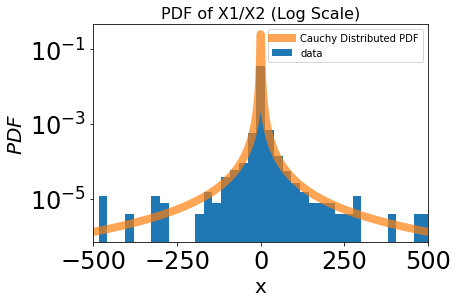

In [105]:
#-----PDF of X1/X2-----

#Plot histogram of data and pdf of data
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(ratio,500, density=True,label = 'data')

plt.tick_params(labelsize = 24)
x = np.linspace(-500,500,1000)

ax.plot(x,stats.cauchy.pdf(x,loc =  fit_loc, scale = fit_beta),linewidth = 8,alpha = 0.7, label = 'Cauchy Distributed PDF')
plt.yscale('log')
plt.xlim([-500,500])

#Setting plot title and lables
ax.set_xlabel('x', size = 20)
ax.set_ylabel('$PDF$', size = 20)
ax.set_title('PDF of X1/X2 (Log Scale)', size = 16)
plt.legend()
plt.show()

### 2c) So far we have looked at 1D probability distributions, but it is possible to have a multi-dimensional vector distribution. A simple first introduction is the 2D Guassian; it looks like a smeared spot. Mathematically this is given by  Xi^+Yj^  where both  X  and  Y  are drawn from 1D Gaussian distributions. **If I measure the amplitude of this vector, what is its pdf?** (Hint, the amplitude is always positive.)

The magnitude of $X\hat{i} + Y\hat{j}$ is $|\vec{XY}| = \sqrt{X^2 + Y^2}$

The ampliutde of a vector is equivalent to the magnitude of the vector. By finding an array of the amplitudes, we can then find the pdf of the distribution of amplitudes. 

Sources: 
- [2-D Gaussian](https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function)

- [Degenerate distribution](https://en.wikipedia.org/wiki/Degenerate_distribution)

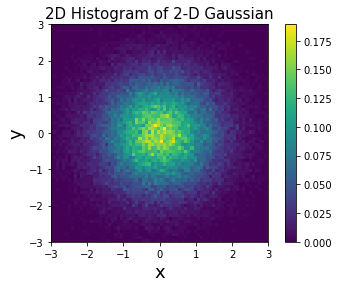

In [101]:
#a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))

x = stats.norm.rvs( scale = 1, size = 100000)
y = stats.norm.rvs( scale = 1, size = 100000)
a = np.vstack((x,y))

a.shape

fig, ax = plt.subplots(1, 1)

h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of 2-D Gaussian", fontsize = 15)
plt.ylabel("y", fontsize = 18)
plt.xlabel("x", fontsize = 18)
plt.colorbar(h[3], ax=ax)

In [95]:
x = stats.norm.rvs( scale = 1, size = 100000)
y = stats.norm.rvs( scale = 1, size = 100000)
a = np.vstack((x,y))
a.shape

(2, 100000)

In [39]:
def amplitude(x,y):
    result = np.sqrt(x**2+y**2)
    return result

In [93]:
amp = np.sort(amplitude(x,y))

ampMean = np.mean(amp)
# ampStd = np.sqrt(np.var(amp))


#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(amp)

print('Find Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)



Erlang Fit Parameters:
    alpha =  5.1857126873763715
    loc =  -0.2719487148271218
    scale =  0.29408925873012737


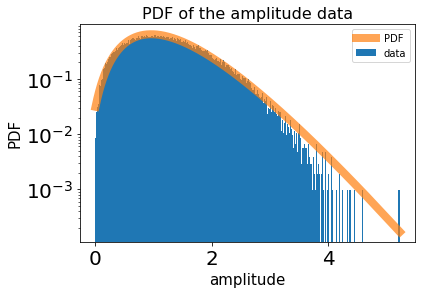

In [94]:
#-----Plot Amplitude------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(amp,500, density=True, label='data')

plt.tick_params(labelsize = 20)
#plt.xlim([9.8,10.3])

#xLinSp = np.linspace(0,5,1000)

#Plots pdf
#ax.plot(xLinSp,stats.gamma.pdf(xLinSp, a = 4, loc = 0, scale = 0.5),linewidth = 8,alpha = 0.7, label='PDF')

ax.plot(amp,stats.gamma.pdf(amp, a = fit_alpha, loc = fit_loc, scale = fit_beta),linewidth = 8,alpha = 0.7, label='PDF')


#Setting plot title and lables
ax.set_xlabel('amplitude', size = 15)
ax.set_ylabel('PDF', size = 15)
ax.set_title('PDF of the amplitude data', size = 16)
plt.legend()
plt.show()